In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [4]:
import pandas as pd

# Read the CSV file into a DataFrame Load the dataset
df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')

In [59]:
df.head(3) # Display the first few rows of the DataFrame

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...


In [60]:
# Display information about the DataFrame When you run this code, it will show you details like the number of non-null values, data types, and memory usage for each column in the DataFrame. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [61]:
# Display summary statistics of numerical columns ,to get a quick overview of the central tendency and spread of numerical data.
df.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing the main characteristics, patterns, and trends within a dataset. 

In [62]:
import matplotlib.pyplot as plt

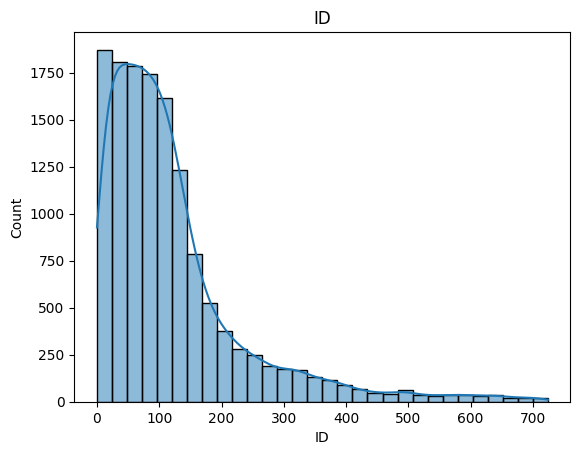

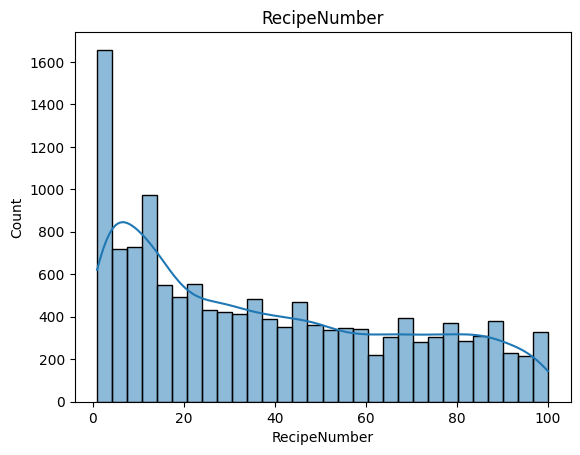

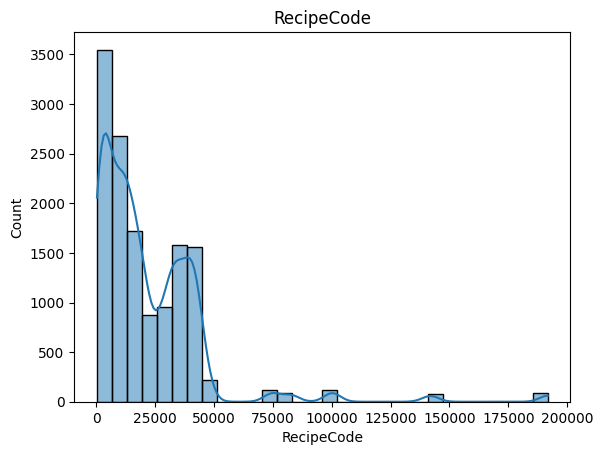

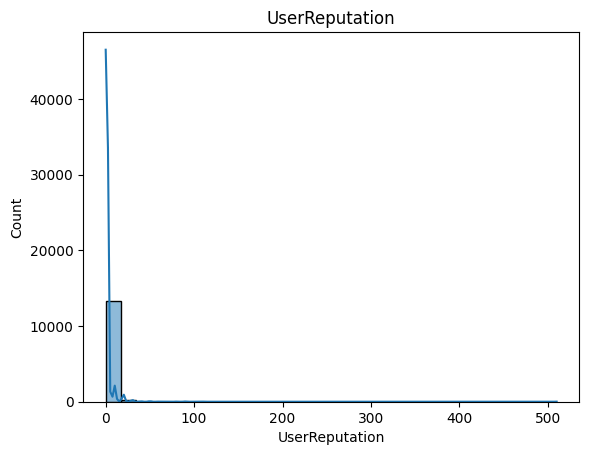

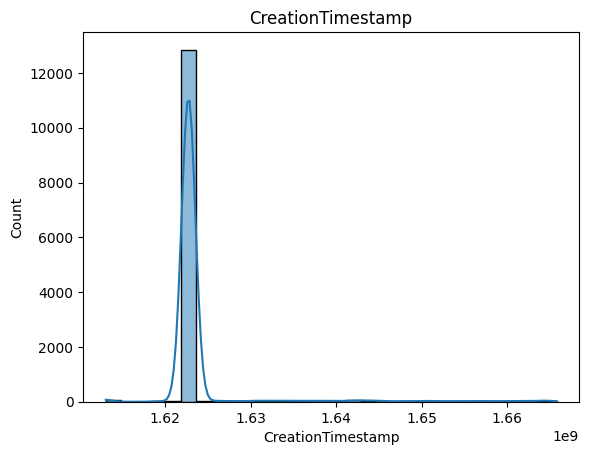

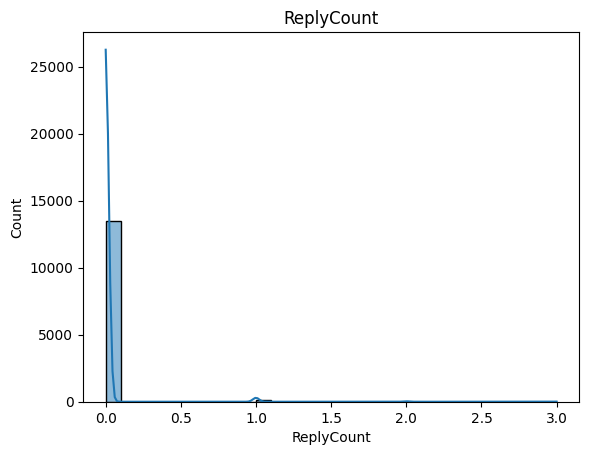

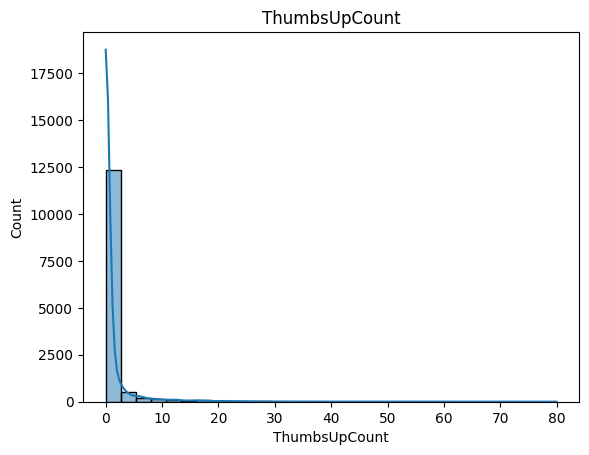

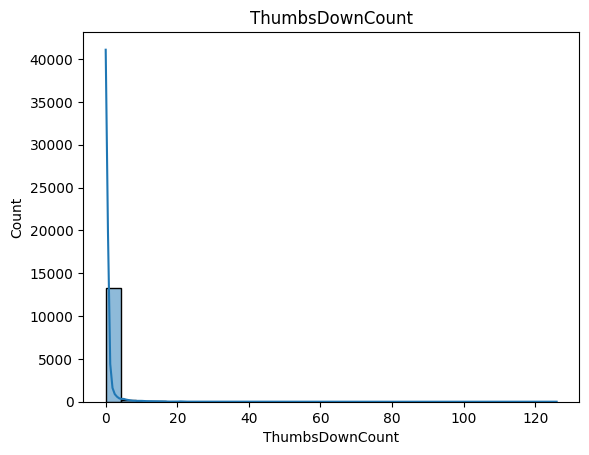

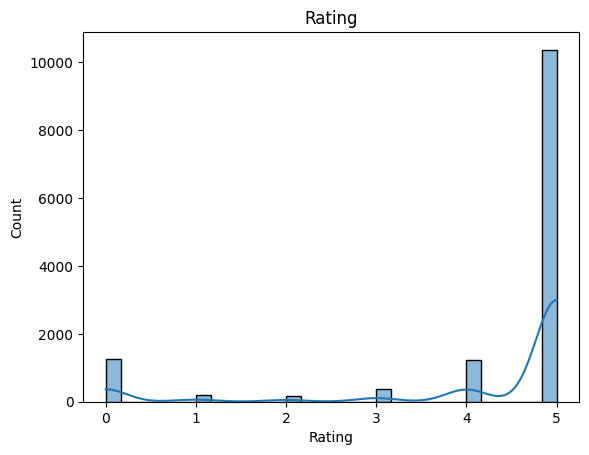

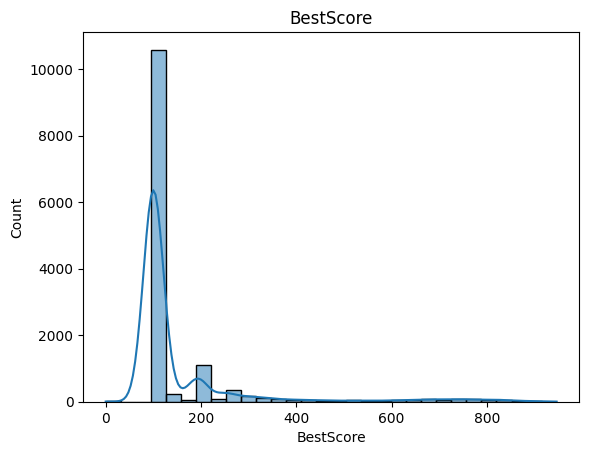

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each numeric column in the DataFrame
for col in df.select_dtypes(include='int64').columns:
    
    # Create a histogram for the current column
    sns.histplot(df[col], bins=30, kde=True)
    
    # Set the title of the plot as the column name
    plt.title(col)
    
    # Display the plot
    plt.show()

# by this, can get idea about the central tendency(whether it is concentrated around 
#particular value or spread out) from this we can see that replycount,userreputation,thumbsup and down and rating are concentrated on some particular values , 
#Data disttribuions whether it is skewed right or 
# left or symmetric. We can get idea of Data range to understand the scale of the features.
#kde = True adds density Estimate to the plot to identify the patters that may not be apparent
# in a standard histogram. and adds a smoothed representation of the distribution


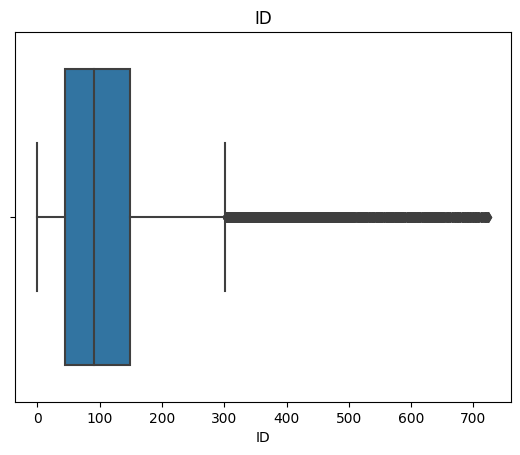

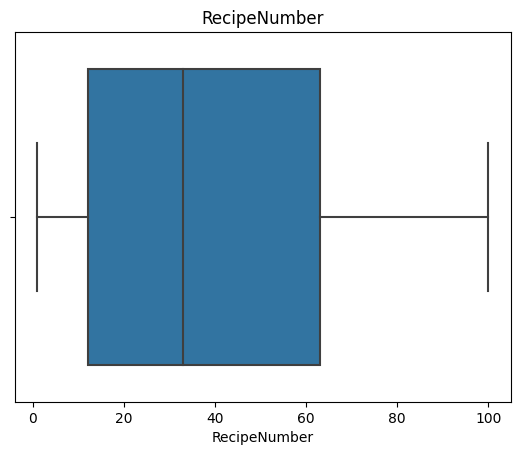

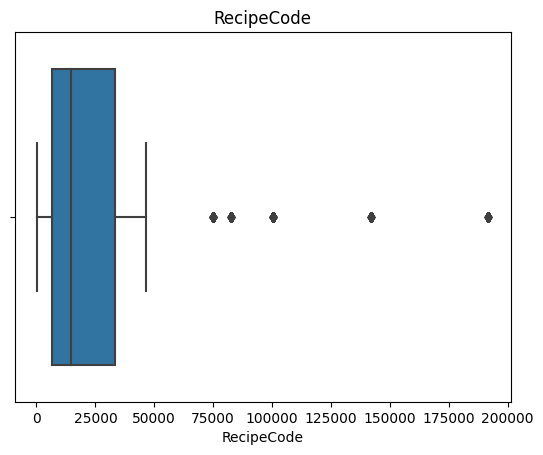

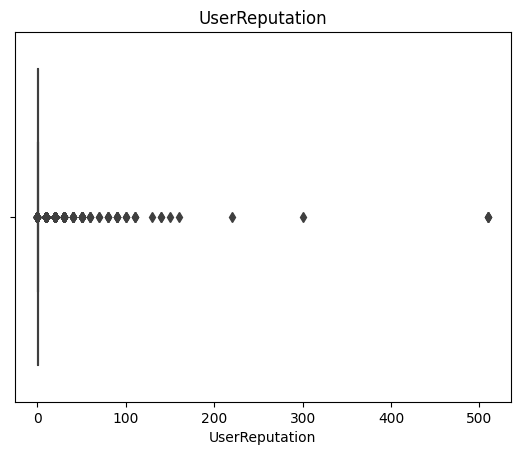

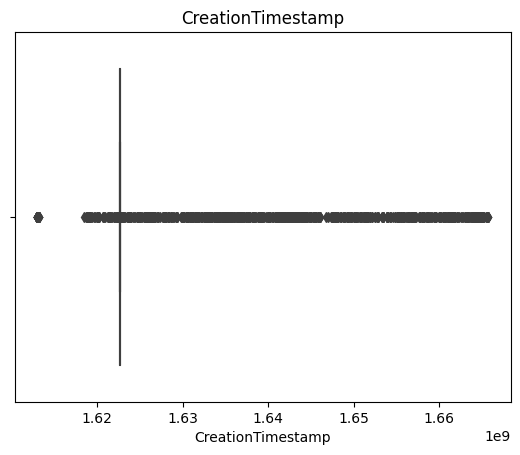

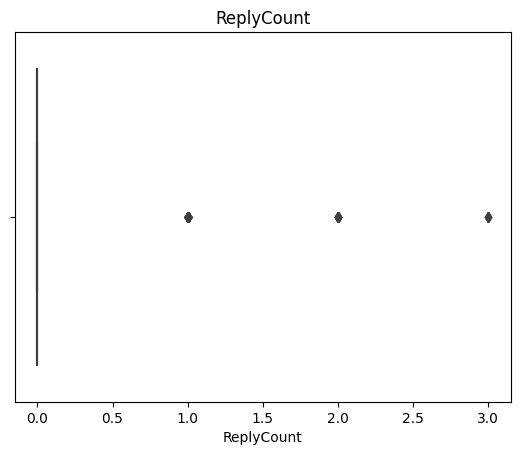

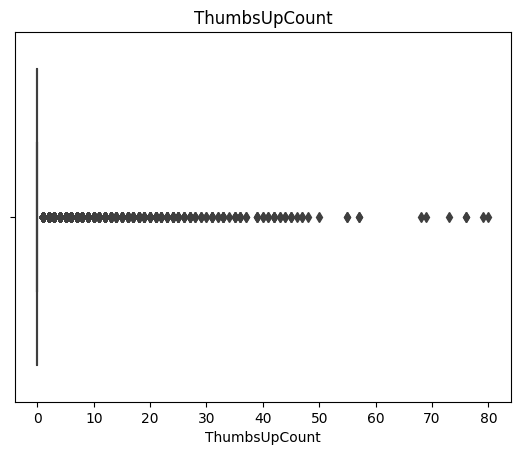

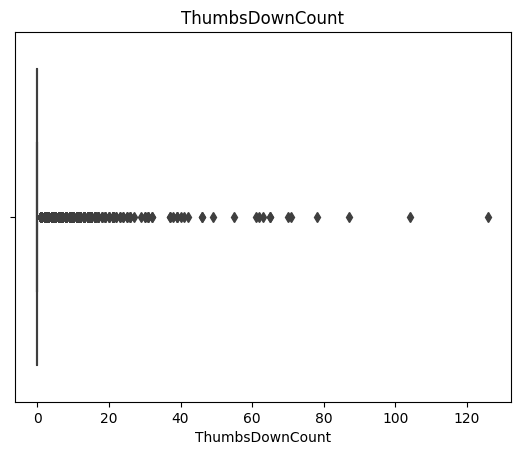

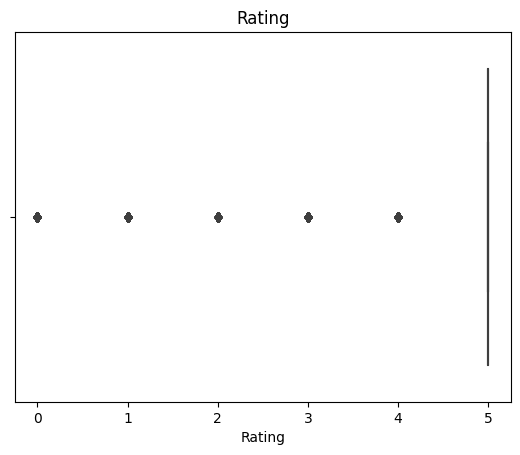

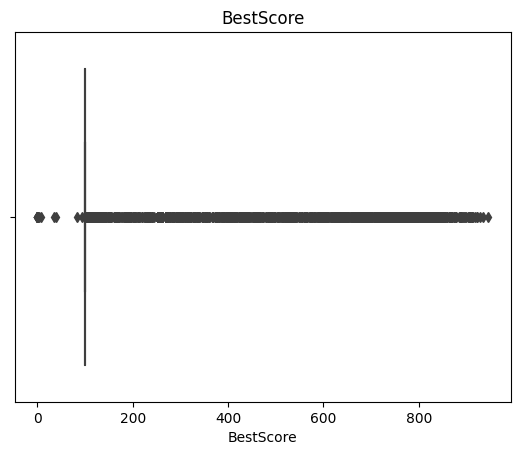

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each numeric column in the DataFrame
for col in df.select_dtypes(include='int64').columns:
    
    # Create a boxplot for the current column
    sns.boxplot(x=col, data=df)
    
    # Set the title of the plot as the column name
    plt.title(col)
    
    # Display the plot
    plt.show()

#A boxplot is a graph that gives a visual indication of how a data set's 
#25th percentile, 50th percentile, 75th percentile, minimum, maximum and outlier 
#values are spread out and compare to each other.
#Q2(50th percentile) the line inside the box represents the median value of distributuion
# Symmetry of the box provides insights into skewness of distribution. We can find the outliers
# which are identified as point beyond whiskers.Outliers: Individual points beyond the whiskers are considered potential outliers.
#there are outliers in this dataset but i haven’t worked on it to remove.

In [65]:
#uniqueness in the categorical columns
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].nunique())
#output indicating how many unique values are present in each categorical column. This information is useful for assessing the diversity and granularity of categorical features.

RecipeName 100
CommentID 13636
UserID 10783
UserName 10620
Recipe_Review 13370


* If the p-value is less than the chosen significance level (commonly 0.05), you reject the null hypothesis. This suggests that there is a significant association between the two variables.
* If the p-value is greater than the significance level, you fail to reject the null hypothesis. This means that you do not have enough evidence to claim a significant association between the variables.

In [66]:
# chi2 To find the independence of variables 

from scipy.stats import chi2_contingency

# Example for 'RecipeName' and 'CommentID'
contingency_table = pd.crosstab(df['RecipeName'], df['CommentID'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")

#Chi-squared: 1349963.9999999995, p-value: 0.4758162846419778
#The chi-squared test is used to determine whether there is a significant association between two categorical variables. 
#The null hypothesis (H0) is that the variables are independent, while the alternative hypothesis (H1) is that there is a significant association between them.
#Therefore, I might interpret it as not having enough evidence to conclude a significant association between 'RecipeName' and 'CommentID' in your dataset based on this 
#chi-squared test and p-value.

Chi-squared: 1349963.9999999995, p-value: 0.4758162846419778


In [67]:
from scipy.stats import chi2_contingency

# Example for 'RecipeName' and 'UserID'
contingency_table = pd.crosstab(df['RecipeName'], df['UserID'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")

#Chi-squared: 1092092.9620523779, p-value: 2.397222576636282e-63
#This suggests i can reject the null hypotheses and that there is a meaningful relationship between the recipe names and user IDs
# because p-value is very close to zero which is significantly below the common significance
# level of 0.05

Chi-squared: 1092092.9620523779, p-value: 2.397222576636282e-63


In [68]:
from scipy.stats import chi2_contingency

# Example for 'RecipeName' and 'UserName'
contingency_table = pd.crosstab(df['RecipeName'], df['UserName'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")

#Chi-squared: 1077409.086889001, p-value: 9.672447988354031e-72
#With such a low p-value (close to zero), you can reject the null hypothesis.This suggests that there is a meaningful relationship between the recipe names and user names
# as u can see below the correlation between username and rating was not stong so didn't it for model.

Chi-squared: 1077409.086889001, p-value: 9.672447988354031e-72


In [69]:
import pandas as pd

#to calculate descriptive statistics for the 'Rating' column within each group. 
recipe_ratings = df.groupby('RecipeName')['Rating'].describe()
print(recipe_ratings)


                           count      mean       std  min  25%  50%  75%  max
RecipeName                                                                   
Amish Breakfast Casserole  249.0  4.489960  1.238210  0.0  5.0  5.0  5.0  5.0
Apple Pie                  165.0  4.042424  1.712050  0.0  4.0  5.0  5.0  5.0
Asian Chicken Thighs       113.0  4.584071  1.178116  0.0  5.0  5.0  5.0  5.0
Bacon Macaroni Salad        72.0  4.486111  1.100487  0.0  4.0  5.0  5.0  5.0
Baked Mushroom Chicken     119.0  4.453782  1.477216  0.0  5.0  5.0  5.0  5.0
...                          ...       ...       ...  ...  ...  ...  ...  ...
Vegetarian Linguine         19.0  4.631579  1.211543  0.0  5.0  5.0  5.0  5.0
White Bean Chicken Chili    98.0  4.071429  1.632467  0.0  4.0  5.0  5.0  5.0
Winning Apple Crisp        141.0  4.007092  1.709204  0.0  4.0  5.0  5.0  5.0
Zucchini Cupcake           204.0  4.352941  1.479895  0.0  5.0  5.0  5.0  5.0
Zucchini Pizza Casserole   251.0  4.657371  1.005055  0.0  5.0  

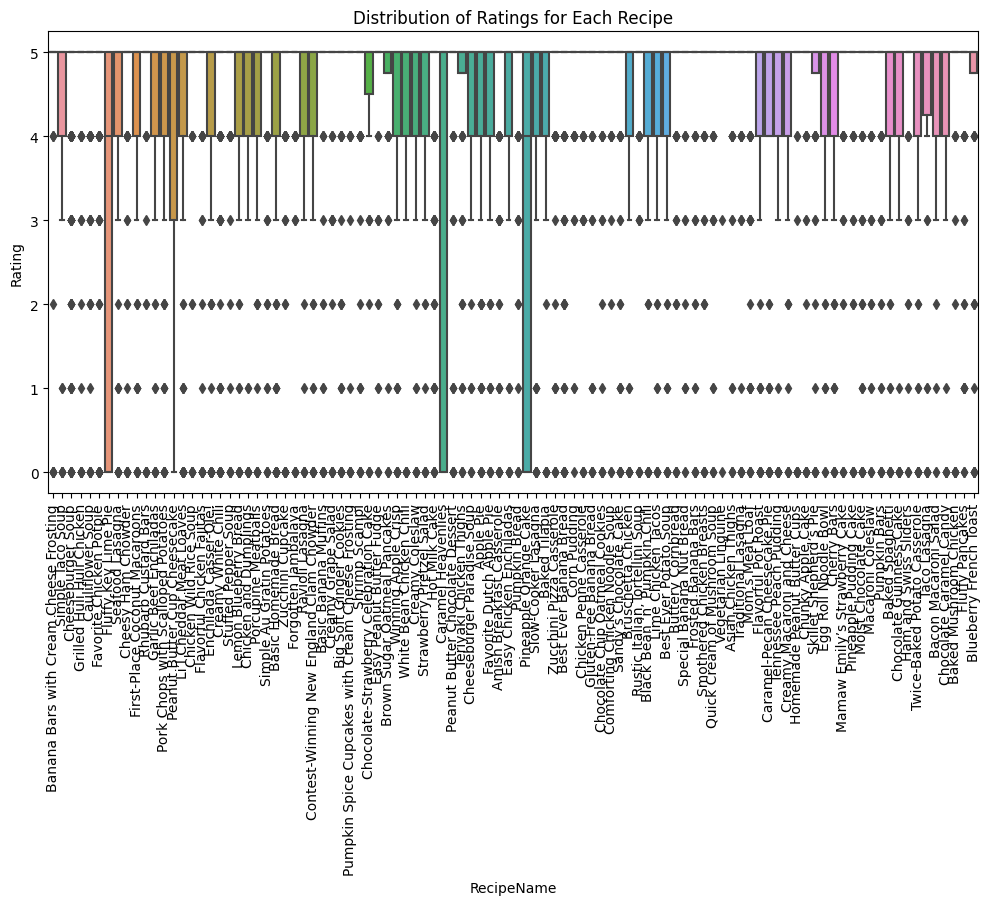

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='RecipeName', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Ratings for Each Recipe')
plt.show()

# Each box represents the interquartile range (IQR) of the ratings,
# with a line inside the box representing the median rating. 
#This visualization helps compare and understand the spread of ratings for different recipes.

In [71]:
correlation = df.groupby('RecipeName')['Rating'].mean().corr(df.groupby('RecipeName')['Rating'].count())
print(f"Correlation between RecipeName and Rating: {correlation}")

#Correlation between RecipeName and Rating: 0.18617305495939632
#In this case, the positive correlation suggests that there might be a slight tendency for certain 
#recipe names to have slightly higher ratings, but the correlation is not strong.
# and this can be explained from the above plot

Correlation between RecipeName and Rating: 0.18617305495939632


In [72]:
correlation_user_rating = df.groupby('UserName')['Rating'].mean().corr(df.groupby('UserName')['Rating'].count())
print(f"Correlation between UserName and Rating: {correlation_user_rating}")

#Correlation between UserName and Rating: 0.04703690511692673
#In this case, the correlation is close to zero, indicating that there is little evidence of a linear relationship between user names and ratings. 
#This suggests that the variation in ratings is not strongly explained by the user names and individual users' ratings do not significantly impact the average ratings

Correlation between UserName and Rating: 0.04703690511692673


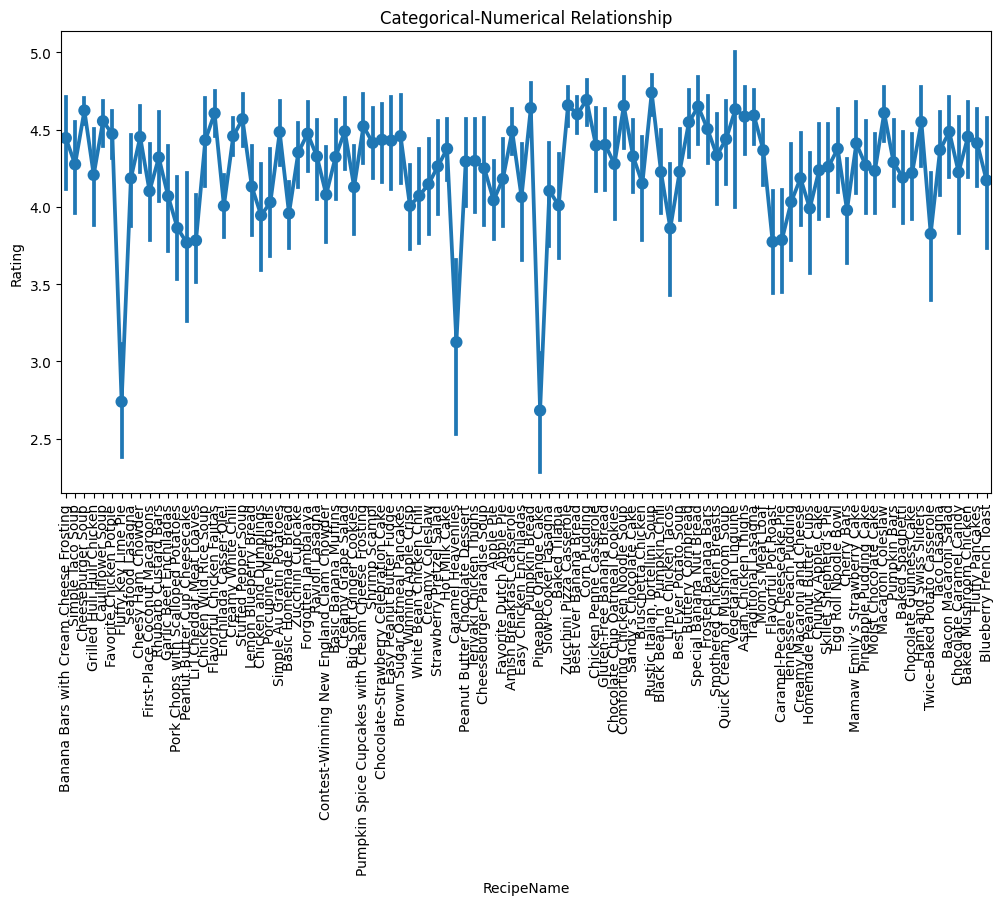

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for 'RecipeName' and 'Rating'
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.pointplot(x='RecipeName', y='Rating', data=df)
plt.title('Categorical-Numerical Relationship')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#This type of plot is useful for showing the average (or another statistic) of the 
#numerical variable for each category of the categorical variable.each point on the 
#plot represents the average rating for a specific recipe.
#Each point on the plot represents the average rating for a specific recipe. The vertical position of the points indicates the average rating, providing an overview of 
#how recipes are generally rated.
#Higher points indicate higher average ratings.

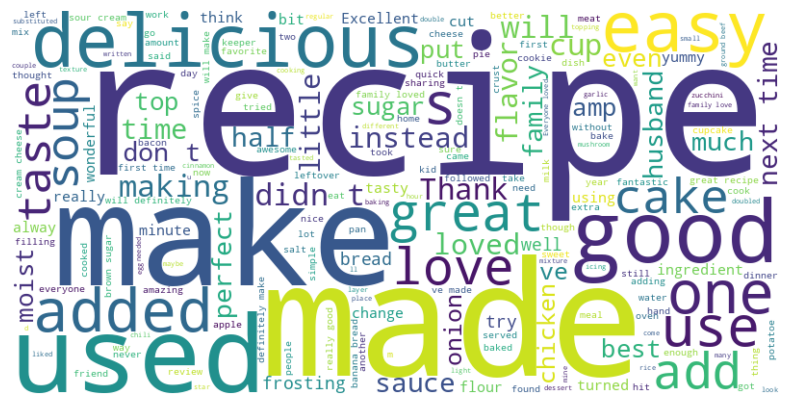

In [103]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(df['Recipe_Review'].dropna().str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#use to find the most frequent occuring words. larger in cloud more common in dataset

Top 10 Recipe Names:
RecipeName
Cheeseburger Soup            553
Creamy White Chili           483
Best Ever Banana Bread       372
Enchilada Casser-Ole!        313
Basic Homemade Bread         307
Favorite Chicken Potpie      303
Flavorful Chicken Fajitas    274
Cauliflower Soup             256
Zucchini Pizza Casserole     251
Amish Breakfast Casserole    249
Name: count, dtype: int64


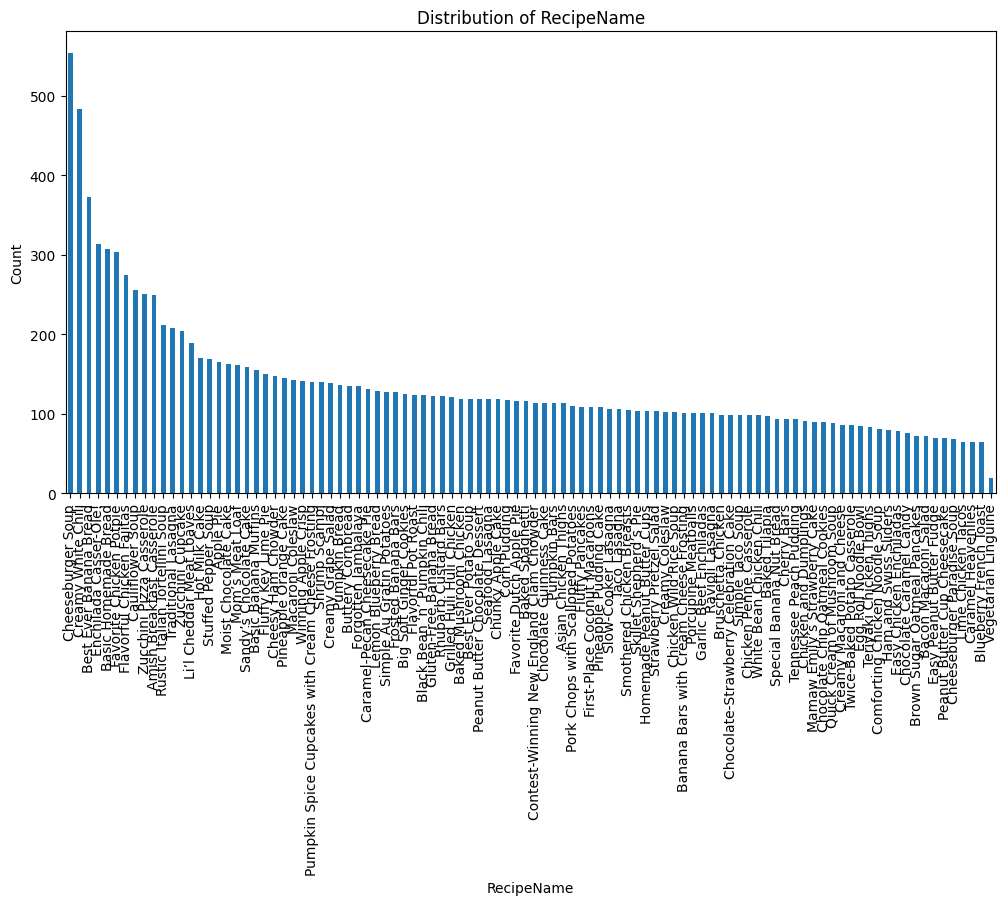

In [75]:
recipe_name_counts = df['RecipeName'].value_counts()

# Display the top N recipe names
top_n = 10
top_recipe_names = recipe_name_counts.head(top_n)
print("Top {} Recipe Names:".format(top_n))
print(top_recipe_names)

# Plot the distribution of RecipeName
plt.figure(figsize=(12, 6))
recipe_name_counts.plot(kind='bar')
plt.title('Distribution of RecipeName')
plt.xlabel('RecipeName')
plt.ylabel('Count')
plt.show()

#by this we can find which name is most common in the recipie name column 

Top 10 User Names:
UserName
mjlouk               21
2124arizona          20
No_Time_To_Cook      20
grandmascooking22    19
justmbeth            18
JGa2595176           16
gunslinger           15
angela32             15
s_pants              14
Sue Zappa            14
Name: count, dtype: int64


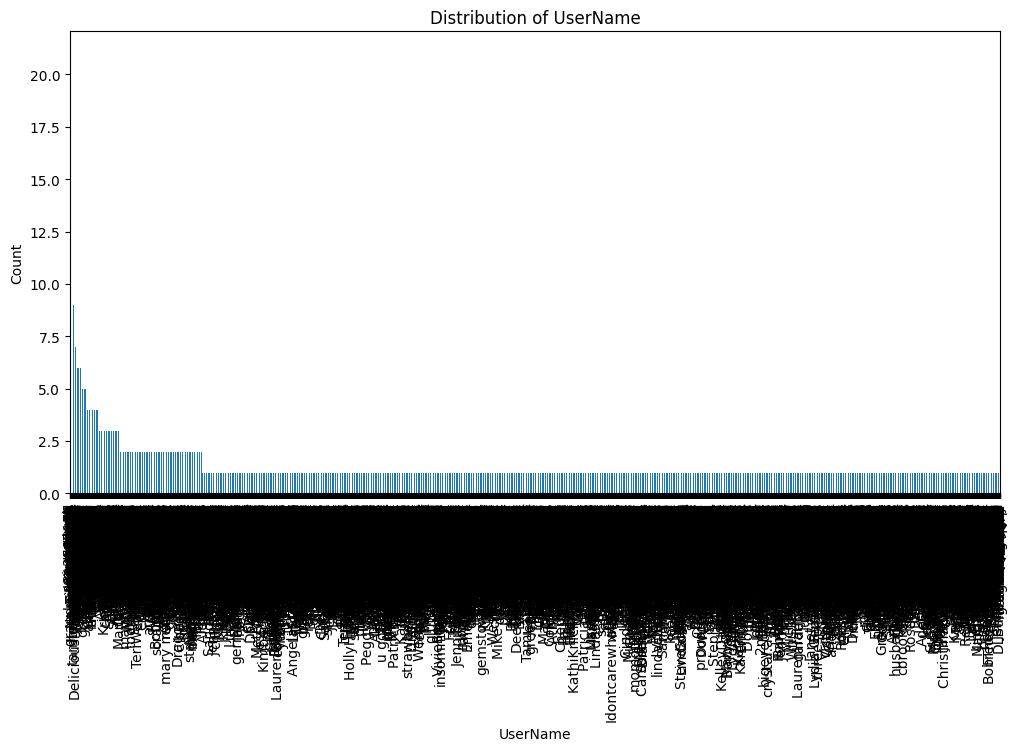

In [76]:
user_name_counts = df['UserName'].value_counts()

# Display the top N user names
top_n = 10
top_user_names = user_name_counts.head(top_n)
print("Top {} User Names:".format(top_n))
print(top_user_names)

# Plot the distribution of UserName
plt.figure(figsize=(12, 6))
user_name_counts.plot(kind='bar')
plt.title('Distribution of UserName')
plt.xlabel('UserName')
plt.ylabel('Count')
plt.show()

#by this we can find the most common user name to see who given more ratings.

In [77]:
unique_comment_ids = df['CommentID'].nunique()
total_comments = len(df)

print("Number of Unique Comment IDs:", unique_comment_ids)
print("Total Number of Comments:", total_comments)

# Check for any duplicate CommentIDs
duplicate_comments = df[df.duplicated('CommentID', keep=False)]
print("Duplicate Comment IDs:")
print(duplicate_comments[['CommentID', 'RecipeName']])

# Explore the distribution of CommentIDs
plt.figure(figsize=(12, 6))
plt.hist(df['CommentID'], bins=50, edgecolor='black')
plt.title('Distribution of CommentIDs')
plt.xlabel('CommentID')
plt.ylabel('Count')
plt.show()

# by this we came to know there anr no duplicate comments

Number of Unique Comment IDs: 13636
Total Number of Comments: 13636
Duplicate Comment IDs:
Empty DataFrame
Columns: [CommentID, RecipeName]
Index: []



KeyboardInterrupt



# Just some extra plots...

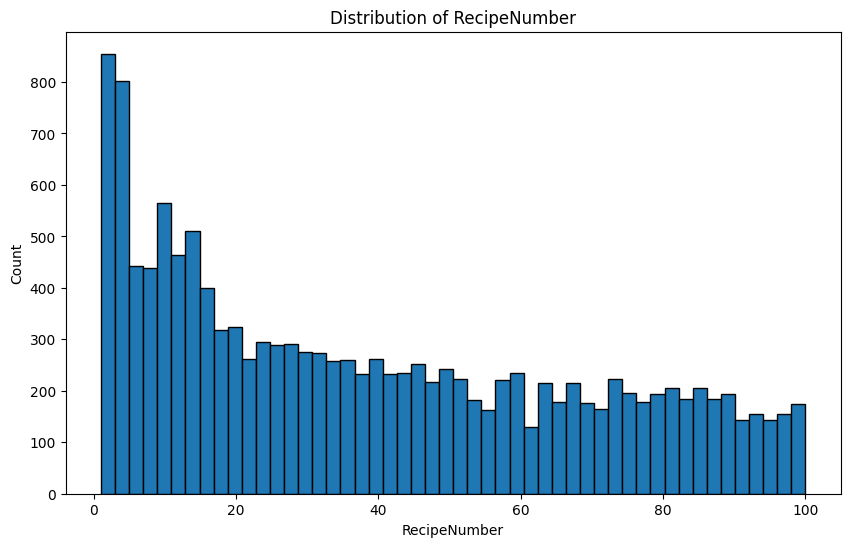

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(df['RecipeNumber'], bins=50, edgecolor='black')
plt.title('Distribution of RecipeNumber')
plt.xlabel('RecipeNumber')
plt.ylabel('Count')
plt.show()


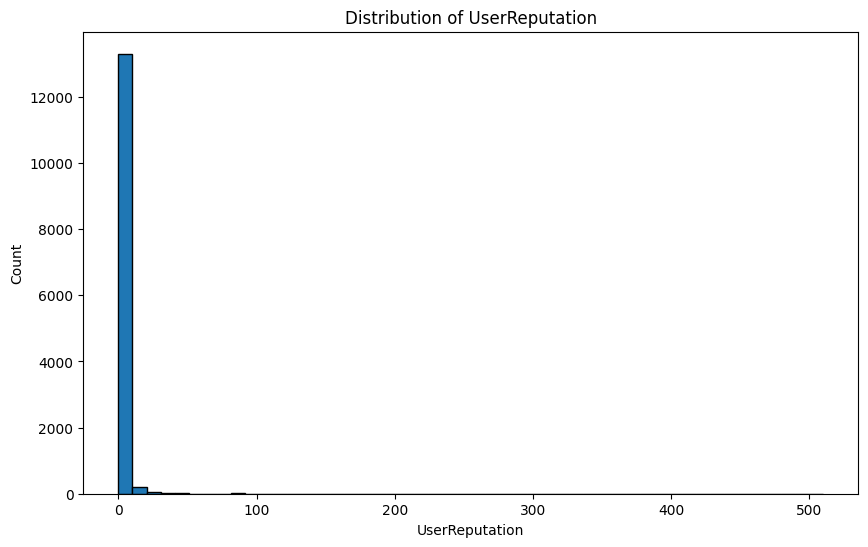

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(df['UserReputation'], bins=50, edgecolor='black')
plt.title('Distribution of UserReputation')
plt.xlabel('UserReputation')
plt.ylabel('Count')
plt.show()


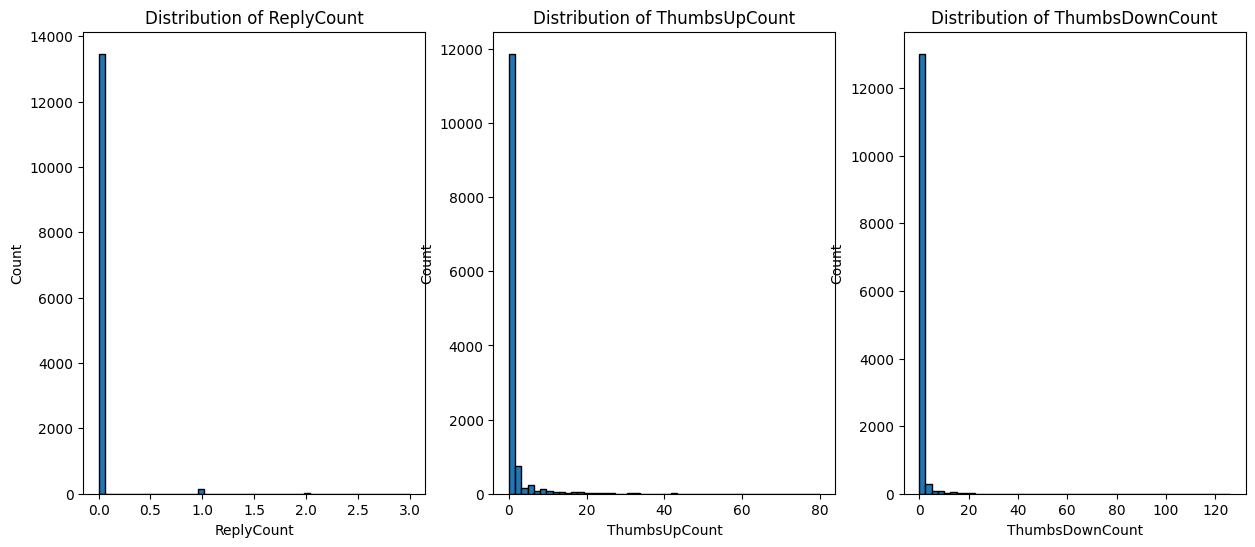

In [80]:
numeric_columns = ['ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount']

plt.figure(figsize=(15, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[column], bins=50, edgecolor='black')
    plt.title('Distribution of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Count')

plt.show()


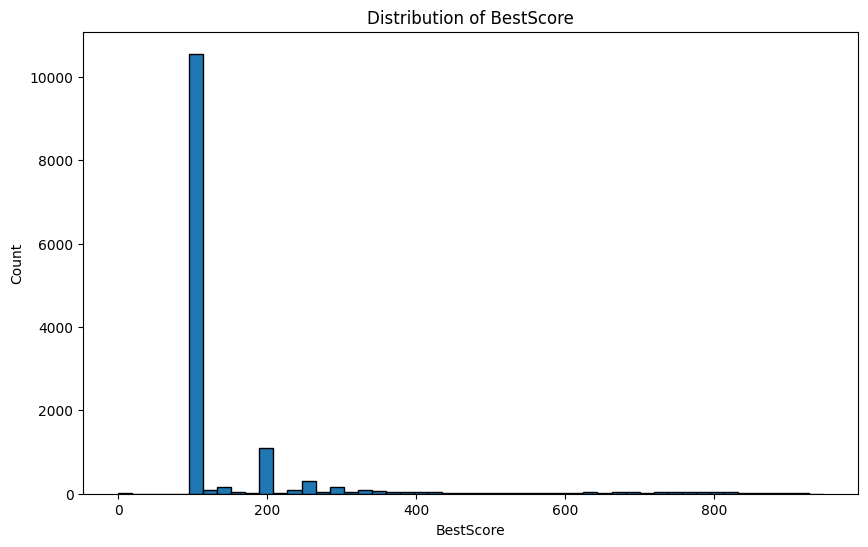

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(df['BestScore'], bins=50, edgecolor='black')
plt.title('Distribution of BestScore')
plt.xlabel('BestScore')
plt.ylabel('Count')
plt.show()


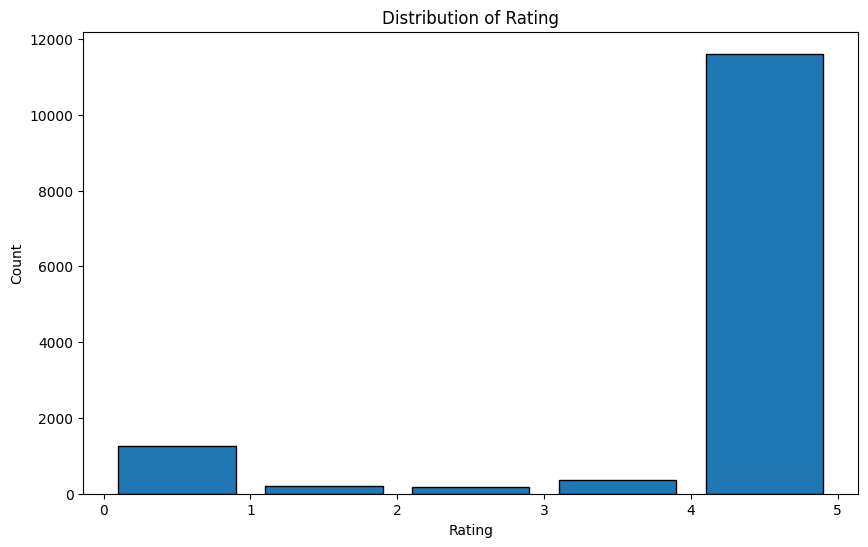

In [82]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=5, edgecolor='black', align='mid', rwidth=0.8)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# Data PreProcessing 

In [5]:
# # without pipeline

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.model_selection import train_test_split
# import pandas as pd


# # Replace NaN values in 'Recipe_Review' column with an empty string
# #Fills missing values in the 'Recipe_Review' column with an empty string. This is a common practice to ensure consistency and prevent issues with further processing.
# df['Recipe_Review'].fillna('', inplace=True)

# # Extract numerical features
# numerical_features = df[['RecipeNumber', 'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']]

# # Extract TF-IDF features from the "Recipe_Review" column------Term Frequency-Inverse Document Frequency.
# reviews = df['Recipe_Review']
# tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)
# tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Extract categorical features
# categorical_features = df[['RecipeName']]

# # One-hot encode categorical features
# onehot_encoder = OneHotEncoder(sparse_output=False, drop='first') #The drop='first' parameter drops the first category to avoid multicollinearity.
# categorical_encoded = onehot_encoder.fit_transform(categorical_features)

# # Combine numerical, TF-IDF, and one-hot encoded categorical features
# X = pd.concat([numerical_features, tfidf_features, pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(['RecipeName']))], axis=1)


# # Target variable
# y = df['Rating']

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature selection using SelectKBest and f_classif on the training set
# k_best = SelectKBest(score_func=f_classif, k=700)
# X_train_selected = k_best.fit_transform(X_train, y_train)
# X_val_selected = k_best.transform(X_val)
# #Feature selection is crucial for reducing dimensionality and focusing on the most informative features. 

# # Display the selected feature indices
# selected_feature_indices = k_best.get_support(indices=True)
# selected_features = X.columns[selected_feature_indices]
# print("Selected Features:", selected_features)

# # this code prepares the data for machine learning by handling missing values, extracting and encoding features, and performing feature selection. However, it does not handle outliers or 
# #standardize/normalize numerical features, which could be additional steps in a comprehensive preprocessing pipeline.

Selected Features: Index(['RecipeNumber', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'BestScore', '12', '15', '25', '34', '350',
       ...
       'RecipeName_Stuffed Pepper Soup', 'RecipeName_Taco Lasagna',
       'RecipeName_Tennessee Peach Pudding',
       'RecipeName_Teriyaki Chicken Thighs', 'RecipeName_Traditional Lasagna',
       'RecipeName_Twice-Baked Potato Casserole',
       'RecipeName_White Bean Chicken Chili', 'RecipeName_Winning Apple Crisp',
       'RecipeName_Zucchini Cupcake', 'RecipeName_Zucchini Pizza Casserole'],
      dtype='object', length=700)


* Significance of Feature Selection: Feature selection using SelectKBest and f_classif is crucial for reducing dimensionality and focusing on the most informative features. It improves model efficiency, reduces noise, and enhances interpretability.
*  SelectKBest Method: SelectKBest with f_classif selects the k best features based on their ANOVA F-statistic. It helps identify features that are most likely to be related to the target variable.

In [84]:
print(df.columns)

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Replace NaN values in 'Recipe_Review' column with an empty string
#Fills missing values in the 'Recipe_Review' column with an empty string. This is a common practice to ensure consistency and prevent issues with further processing.
df['Recipe_Review'].fillna('', inplace=True)

# Define numerical features
numerical_features = ['RecipeNumber', 'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
#Numerical features are necessary for many machine learning algorithms, and these specific features seemed relevant to predict the recipe rating.

# Define categorical features
categorical_features = ['RecipeName']
#One-hot encoding is suitable for categorical variables with no inherent order. It helps prevent bias in the model.

# Create a column transformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features),
        ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english'), 'Recipe_Review')
    ])

#TF-IDF features were extracted from the 'Recipe_Review' text to capture the importance of words in predicting ratings.
#Utilizes TF-IDF (Term Frequency-Inverse Document Frequency) to convert text data ('Recipe_Review') into numerical features, capturing the importance of words

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=700))
])

# Assuming 'Rating' is your target variable
X = df.drop('Rating', axis=1)
y = df['Rating']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse matrices
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_val_selected_scaled = scaler.transform(X_val_selected)

# this code prepares the data for machine learning by handling missing values, extracting and encoding features, and performing feature selection. However, it does not handle outliers or standardize/normalize numerical features, which could be additional steps in a comprehensive preprocessing pipeline.
#Tf-idf usually results into sparse matrix and sparse matrix have large number of zero elements. when working with sparse data (data with a large number of zeros)
#with_mean=False in StandardScaler ensures that the mean is not computed for zero values, preserving the sparsity of the data and preventing unnecessary computation for zero-filled entries

# Simple SVM

* When you create an instance of a machine learning model without specifying any hyperparameters, it uses default values.
* Uses default values provided by the library or framework.

In [86]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Standardize the features for SVM  sensitive to the scale of features.
# scaler = StandardScaler()
# X_train_selected_scaled = scaler.fit_transform(X_train_selected)
# X_val_selected_scaled = scaler.transform(X_val_selected)

# # Define the SVM model
# svm_model = SVC()

# # Fit the SVM model to the training data
# svm_model.fit(X_train_selected_scaled, y_train)

# # Make predictions on the validation data
# predictions = svm_model.predict(X_val_selected_scaled)

# # Calculate accuracy on the validation set
# accuracy = accuracy_score(y_val, predictions)
# print("Validation Set Accuracy:", accuracy)

#The default hyperparameters for SVC include using the radial basis function ('rbf') kernel, C=1.0, and gamma='scale'.

# # Validation Set Accuracy: 0.7606304985337243

# SVM with Randomized search cv

* RandomizedSearchCV performs a randomized search over a predefined hyperparameter space.
* Instead of searching exhaustively over all possible combinations of hyperparameters (as in grid search), it randomly samples a specified number of combinations.
* This random sampling is beneficial when the hyperparameter space is large, as it provides a more computationally efficient approach to find good hyperparameter values.

In [87]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# # Define the SVM model with pipeline (including scaling for SVM)
# svm_model = make_pipeline(StandardScaler(), SVC())

# # Define the hyperparameters you want to tune
# param_dist = {
#     'svc__C': [0.001, 0.01,0.1],
#     'svc__kernel': ['poly', 'rbf'],
#     'svc__gamma': ['scale', 'auto']
# }

# # Create RandomizedSearchCV
# random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# # Fit the random search to the data
# random_search.fit(X_train_selected, y_train)

# # Print the best hyperparameters and their corresponding score
# print("Best Hyperparameters:", random_search.best_params_)
# print("Validation Set Accuracy:", random_search.best_score_)

#RandomizedSearchCV is a method for hyperparameter tuning that performs a randomized search over a predefined hyperparameter space.

# # Best Hyperparameters: {'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__C': 0.001}
# # Validation Set Accuracy: 0.7658599327329478

# Logistic regression with Randomized search cv

In [88]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.preprocessing import StandardScaler


# # Standardize the features since logistic regression is sensitive to the scale
# scaler = StandardScaler()
# X_train_selected_scaled = scaler.fit_transform(X_train_selected)

# # Define the logistic regression model
# logistic_model = LogisticRegression()

# # Define the hyperparameters you want to tune
# param_dist = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100], #regularization strength
#     'max_iter': [1000, 2000, 3000, 4000, 5000]
# }

# # Create RandomizedSearchCV
# random_search = RandomizedSearchCV(logistic_model, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# # Fit the random search to the data
# random_search.fit(X_train_selected_scaled, y_train)

# # Print the best hyperparameters and their corresponding score
# print("Best Hyperparameters:", random_search.best_params_)
# print("Validation Set Accuracy:", random_search.best_score_)


# Best Hyperparameters: {'penalty':'l2','C':0.01,'max_iter':1000}
# Validation Set Accuracy: 0.7612499327323510   

# SVM with Grid search 

* GridSearchCV performs an exhaustive search over a specified hyperparameter grid.
* It evaluates the model's performance for all possible combinations of hyperparameters within the specified grid.
* While grid search provides a thorough exploration of the hyperparameter space, it can be computationally expensive, especi

In [89]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# # Standardize the features since SVM is sensitive to the scale
# scaler = StandardScaler()
# X_train_selected_scaled = scaler.fit_transform(X_train_selected)
# X_val_selected_scaled = scaler.transform(X_val_selected)

# # Define the SVM model
# svm_model = SVC()

# # Define the hyperparameters you want to tune
# param_grid = {
#     'C': [ 0.1, 10, 100],
#     'kernel': ['rbf', 'poly'],
#     'degree': [2, 3],
#     'gamma': [ 'auto']
# }

# # Create GridSearchCV
# grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search_svm.fit(X_train_selected_scaled, y_train)

# # Print the best hyperparameters and their corresponding score
# print("Best Hyperparameters:", grid_search_svm.best_params_)
# print("Validation Set Accuracy:", grid_search_svm.best_score_)

# # Get the best model
# best_svm_model = grid_search_svm.best_estimator_

# # Evaluate the best model on the validation set
# validation_score = best_svm_model.score(X_val_selected_scaled, y_val)
# print("Validation Set Accuracy:", validation_score)


# Best Hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
# Validation Set Accuracy: 0.7618262210382054
# Validation Set Accuracy: 0.7554985337243402

# Simple SVM is the baseline model without hyperparameter tuning, RandomizedSearchCV explores a random subset of hyperparameter combinations, and GridSearchCV exhaustively searches through all specified hyperparameter combinations

* RandomizedSearchCV is often preferred for large hyperparameter spaces, while GridSearchCV might be suitable for smaller spaces or when computational resources allow for an exhaustive search.

# KNN with grid search

Too time consuming and low validation score

In [14]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler


# # Standardize the features since KNN is a distance-based algorithm
# scaler = StandardScaler()
# X_train_selected_scaled = scaler.fit_transform(X_train_selected)
# X_val_selected_scaled = scaler.transform(X_val_selected)

# # Define the KNN model
# knn_model = KNeighborsClassifier()

# # Define the hyperparameters you want to tune
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
# }

# # Create GridSearchCV
# grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search_knn.fit(X_train_selected_scaled, y_train)

# # Print the best hyperparameters and their corresponding score
# print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)
# print("Validation Set Accuracy for KNN:", grid_search_knn.best_score_)

# # Best Hyperparameters for KNN: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
# # Validation Set Accuracy for KNN: 0.7639349670578042


Best Hyperparameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Validation Set Accuracy for KNN: 0.7632932277804605


In [16]:
# from sklearn.metrics import classification_report, confusion_matrix

# # Predictions on the validation set
# y_val_pred = grid_search.predict(X_val_selected_scaled)

# # 1. Classification Report
# print("Classification Report:")
# print(classification_report(y_val, y_val_pred, target_names=[str(i) for i in range(0,6)]))

# # 2. Confusion Matrix
# conf_matrix = confusion_matrix(y_val, y_val_pred)
# print("Confusion Matrix:")
# print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.28      0.31       257
           1       0.57      0.20      0.29        41
           2       0.00      0.00      0.00        34
           3       0.67      0.07      0.13        85
           4       0.38      0.09      0.15       250
           5       0.81      0.95      0.87      2061

    accuracy                           0.76      2728
   macro avg       0.46      0.27      0.29      2728
weighted avg       0.71      0.76      0.71      2728

Confusion Matrix:
[[  73    2    1    0    2  179]
 [  13    8    0    1    1   18]
 [   6    4    0    1    4   19]
 [  17    0    1    6   12   49]
 [  27    0    0    1   23  199]
 [  81    0    0    0   18 1962]]


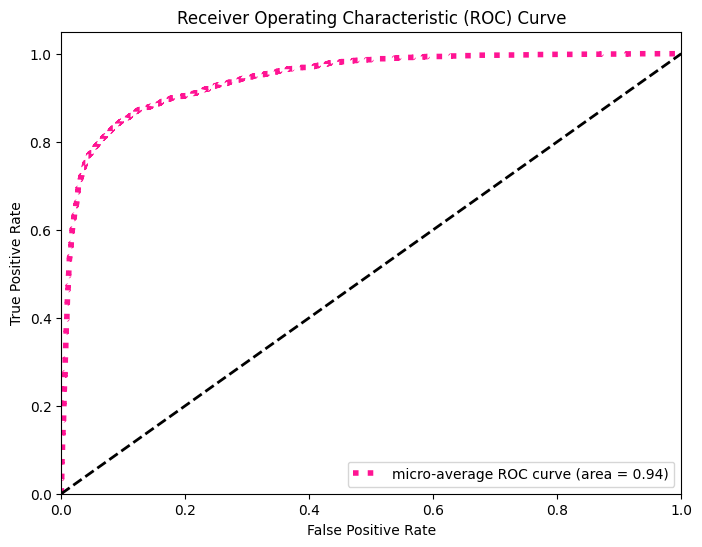

In [15]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize
# import matplotlib.pyplot as plt

# # Binarize the labels
# y_val_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5])
# n_classes = y_val_bin.shape[1]

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_scores[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_val_scores.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot micro-average ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


# Logistic with grid search

In [91]:
#without pipeline

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler


# # Standardize the features since logistic regression is sensitive to the scale
# scaler = StandardScaler()
# X_train_selected_scaled = scaler.fit_transform(X_train_selected)
# X_val_selected_scaled = scaler.transform(X_val_selected)

# # Define the logistic regression model
# logistic_model = LogisticRegression()

# # Define the hyperparameters you want to tune
# param_grid = {
#     'penalty': [ 'l2'],
#     'C': [0.001, 0.01,10],
#     'max_iter': [2000,3000]
# }

# # Create GridSearchCV
# grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train_selected_scaled, y_train)

# # Print the best hyperparameters and their corresponding score
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Validation Set Accuracy:", grid_search.best_score_)

# # Best Hyperparameters: {'C': 0.001, 'max_iter': 2000, 'penalty': 'l2'}
# # Validation Set Accuracy: 0.7728274057553128


* Logistic regression is a straightforward and computationally efficient algorithm.
* Logistic regression is a simple and well-understood algorithm. It serves as a good baseline model and is easy to implement.

In [7]:
#GridSearchCV is used to perform an exhaustive search over a specified parameter grid, and the combination of hyperparameters that gives the best validation set accuracy is selected.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Standardize the features since logistic regression is sensitive to the scale
scaler = StandardScaler(with_mean = False)
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_val_selected_scaled = scaler.transform(X_val_selected)

# Define the logistic regression model
logistic_model = LogisticRegression()

# Define the hyperparameters you want to tune
param_grid = {
    'penalty': ['l2'],  # Corrected penalty value
    'C': [0.001, 0.01, 10], # Smaller values specify stronger regularization.
    'max_iter': [2000, 3000] #Maximum number of iterations for the solver to converge.
}

# Create GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_selected_scaled, y_train)

# Print the best hyperparameters and their corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Validation Set Accuracy:", grid_search.best_score_)

#Best Hyperparameters: {'C': 0.001, 'max_iter': 2000, 'penalty': 'l2'} provides the best trade-off between model complexity and predictive performance for the given data.
# Validation Set Accuracy: 0.773560972165662

Best Hyperparameters: {'C': 0.001, 'max_iter': 2000, 'penalty': 'l2'}
Validation Set Accuracy: 0.7728274057553128


* Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations rather than the underlying patterns
*  Underfitting occurs when a model is too simple to capture the underlying patterns in the training data

# Evaluation metrics

* The classification report presents metrics like precision, recall, and F1-score for each class, providing a detailed understanding of how well the model performs on individual classes.
* The confusion matrix gives a visual representation of correct and incorrect predictions for each class, aiding in identifying areas where the model may excel or struggle. 

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the validation set
y_val_pred = grid_search.predict(X_val_selected_scaled)

# 1. Classification Report
print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=[str(i) for i in range(0,6)]))


# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Precision: Ratio of correctly predicted positive observations to the total predicted positives.
# Recall (Sensitivity or True Positive Rate): Ratio of correctly predicted positive observations to all actual positives.
# F1 Score: The weighted average of precision and recall, providing a balance between the two.

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.12      0.19       257
           1       0.70      0.17      0.27        41
           2       0.00      0.00      0.00        34
           3       0.55      0.07      0.12        85
           4       0.33      0.06      0.10       250
           5       0.78      0.99      0.87      2061

    accuracy                           0.77      2728
   macro avg       0.47      0.23      0.26      2728
weighted avg       0.69      0.77      0.69      2728

Confusion Matrix:
[[  31    1    0    0    5  220]
 [   4    7    0    2    3   25]
 [   0    2    0    2    5   25]
 [   5    0    1    6    9   64]
 [   5    0    0    1   14  230]
 [  20    0    0    0    7 2034]]


* The model performs well for the majority class (Class 5), showing high precision and recall.
* However, it struggles with minority classes (Classes 0, 1, 2, 3, 4), displaying lower precision and recall.
* Class 2 has particularly poor performance with both precision and recall being zero.
* The accuracy is relatively high, but the model's effectiveness varies across different classes.
* confusion matrix
* class 0: Predicted as Class 0 for 31 instances, Class 4 for 5 instances, and Class 5 for 220 instances.
* Class 1: Predicted as Class 1 for 7 instances, Class 3 for 2 instances, and Class 5 for 25 instances.

In [12]:
from sklearn.metrics import roc_auc_score

# Predictions on the validation set
y_val_pred = grid_search.predict(X_val_selected_scaled)
y_val_scores = grid_search.predict_proba(X_val_selected_scaled)

# Compute ROC-AUC for each class
roc_auc_scores = []
for i in range(len(grid_search.classes_)):
    y_true_class_i = (y_val == i).astype(int)
    y_score_class_i = y_val_scores[:, i]
    roc_auc_i = roc_auc_score(y_true_class_i, y_score_class_i)
    roc_auc_scores.append(roc_auc_i)

# Print ROC-AUC for each class
for i, auc_score in enumerate(roc_auc_scores):
    print(f"Class {i}: AUC = {auc_score}")

# To show the discrimination ability in the model
#class 0: moderate discrimination  difficulty distinguishing this class.
#class 1: perform very well in distinguishing well-separated from other classes, indicating strong predictive performance.
#class 2: Instances from Class 2 are effectively identified
#class 3:  not as strong as some other classe
#class 4: moderate discrimination 
#class 5: moderate discrimination 

Class 0: AUC = 0.7194380888343698
Class 1: AUC = 0.9259306325850755
Class 2: AUC = 0.9022883095331673
Class 3: AUC = 0.8378046337717835
Class 4: AUC = 0.7461404358353512
Class 5: AUC = 0.7738277877073108


1. AUC: Measures the ability of the model to discriminate between different classes, focusing on the trade-off between true positive rate and false positive rate across various probability thresholds.
1. Precision-Recall Metrics (Precision, Recall, F1-Score): Focus on the performance of the model at a specific probability threshold, providing insights into how well the model is identifying positive instances among those predicted as positive.

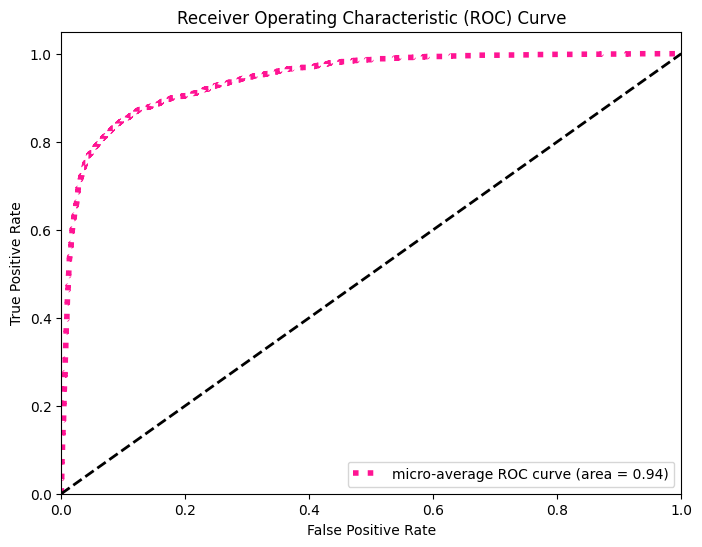

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_val_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_val_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_val_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


* An AUC (Area Under the Curve) of 0.94 indicates excellent overall performance of the model in distinguishing between positive and negative instances across all classes.
* The micro-average aggregates the contributions of all classes to compute the average ROC curve. In this case, it combines the true positive and false positive rates across all classes. The area under this curve (AUC) represents the overall performance of the model in distinguishing between positive and negative instances.

Best Hyperparameters: {'C': 0.001, 'max_iter': 2000, 'penalty': 'l2'}
Validation Set Accuracy: 0.7728274057553128


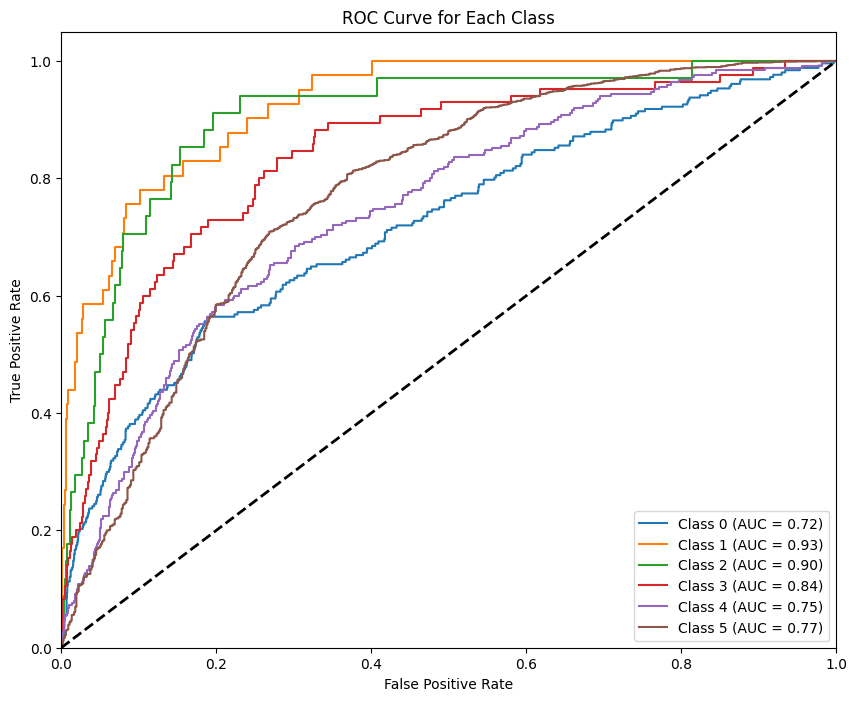

In [9]:
# Fit the grid search to the data
grid_search.fit(X_train_selected_scaled, y_train)

# Get predicted probabilities on the validation set
y_val_scores = grid_search.predict_proba(X_val_selected_scaled)

# Print the best hyperparameters and their corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Validation Set Accuracy:", grid_search.best_score_)

# Assuming y_val_scores contains the predicted probabilities for each class
# and y_val_bin is the binarized true labels
y_val_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


# Testing

In [93]:
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [94]:
#without pipeline

# # Replace NaN values in 'Recipe_Review' column with an empty string
# test['Recipe_Review'].fillna('', inplace=True)

# # Extract numerical features from the test data
# numerical_features_test = test[['RecipeNumber', 'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']]

# # Extract TF-IDF features from the "Recipe_Review" column in the test data
# reviews_test = test['Recipe_Review']
# tfidf_matrix_test = tfidf_vectorizer.transform(reviews_test)
# tfidf_features_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Extract categorical features from the test data (assuming the same columns as in training data)
# categorical_features_test = test[['RecipeName']]

# # Check for any new categories in the test set not seen during training
# new_categories = set(categorical_features_test.values.flatten()) - set(onehot_encoder.get_feature_names_out(['RecipeName']))
# if new_categories:
#     # Handle new categories appropriately, you might want to update the encoder or handle them in a way that suits your context.
#     print(f"New categories found: {new_categories}")

# # One-hot encode categorical features in the test data
# categorical_encoded_test = onehot_encoder.transform(categorical_features_test)

# # Combine numerical, TF-IDF, and one-hot encoded categorical features in the test data
# X_test = pd.concat([numerical_features_test, tfidf_features_test, pd.DataFrame(categorical_encoded_test, columns=onehot_encoder.get_feature_names_out(['RecipeName']))], axis=1)

# # Apply Feature Selection on Test Data using the same SelectKBest instance
# X_test_selected = k_best.transform(X_test)

# # Display the selected feature indices for test data
# selected_features_test_indices = k_best.get_support(indices=True)
# selected_features_test = X_test.columns[selected_features_test_indices]
# print("Selected Features for Test Data:", selected_features_test)


In [100]:
#with pipeline

test['Recipe_Review'].fillna('', inplace=True)

# Extract features from the test data
X_test = test.copy()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Transform the test data using the fitted pipeline
X_test_selected = pipeline.transform(X_test)

# Standardize the features in the test data
X_test_selected_scaled = scaler.transform(X_test_selected)

# Get the best model from the grid search
best_logistic_model = grid_search.best_estimator_

# Make predictions on the test data
test_predictions = best_logistic_model.predict(X_test_selected_scaled)

# Create DataFrame for predictions
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] =  [i for i in range(1,4547)]  # Assuming 'ID' is the column containing the IDs in the test DataFrame
submission['Rating'] = test_predictions

# Save predictions to CSV
submission.to_csv('submission.csv', index=False)

# Display the predictions
print(submission)


        ID  Rating
0        1       5
1        2       5
2        3       5
3        4       5
4        5       5
...    ...     ...
4541  4542       5
4542  4543       5
4543  4544       5
4544  4545       1
4545  4546       5

[4546 rows x 2 columns]


In [96]:
# without pipeline

# # Standardize the test features using the same scaler
# X_test_selected_scaled = scaler.transform(X_test_selected)

# # Get the best model from the grid search
# best_logistic_model = grid_search.best_estimator_

# # Make predictions on the test data
# test_predictions = best_logistic_model.predict(X_test_selected_scaled)

# # Create DataFrame for predictions
# submission = pd.DataFrame(columns=['ID','Rating'])
# submission['ID'] = [i for i in range(1,4547)] 
# submission['Rating'] = test_predictions

# # Save predictions to CSV
# submission.to_csv('submission.csv', index=False)

# # Display the predictions
# print(submission)


        ID  Rating
0        1       5
1        2       5
2        3       5
3        4       5
4        5       5
...    ...     ...
4541  4542       5
4542  4543       5
4543  4544       5
4544  4545       1
4545  4546       5

[4546 rows x 2 columns]


In [101]:
pd.read_csv('/kaggle/working/submission.csv')

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
4541,4542,5
4542,4543,5
4543,4544,5
4544,4545,1


# Comparing Model's

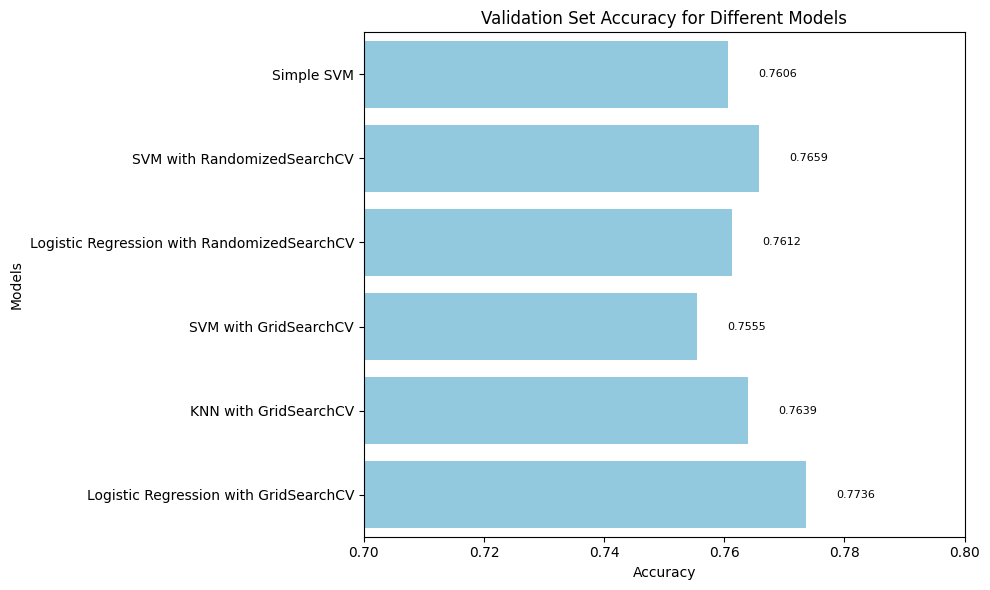

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of models
models = ['Simple SVM', 'SVM with RandomizedSearchCV', 'Logistic Regression with RandomizedSearchCV',
          'SVM with GridSearchCV', 'KNN with GridSearchCV', 'Logistic Regression with GridSearchCV']

# Corresponding validation set accuracies
accuracies = [0.7606304985337243, 0.7658599327329478, 0.7612499327323510, 0.7554985337243402, 0.7639349670578042, 0.773560972165662]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=models, color='skyblue')
plt.title('Validation Set Accuracy for Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0.7, 0.8)  # Set x-axis range for better visualization

# Display the accuracy values on the right of the bars
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.005, i, f'{acc:.4f}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

#Highest accuracy achieved by Logistic Regression with Grid searcch cv
#Followed by gistic Regression with RandomizedSearchCV and SVM with RandomizedSearchCV also performed well, with accuracies around 76.1% and 76.6%, respectively
#Simple SVM and SVM with GridSearchCV exhibit slightly lower accuracies, around 75.5% and 75.6%, respectively
#KNN with GridSearchCV achieved an accuracy of approximately 76.4%


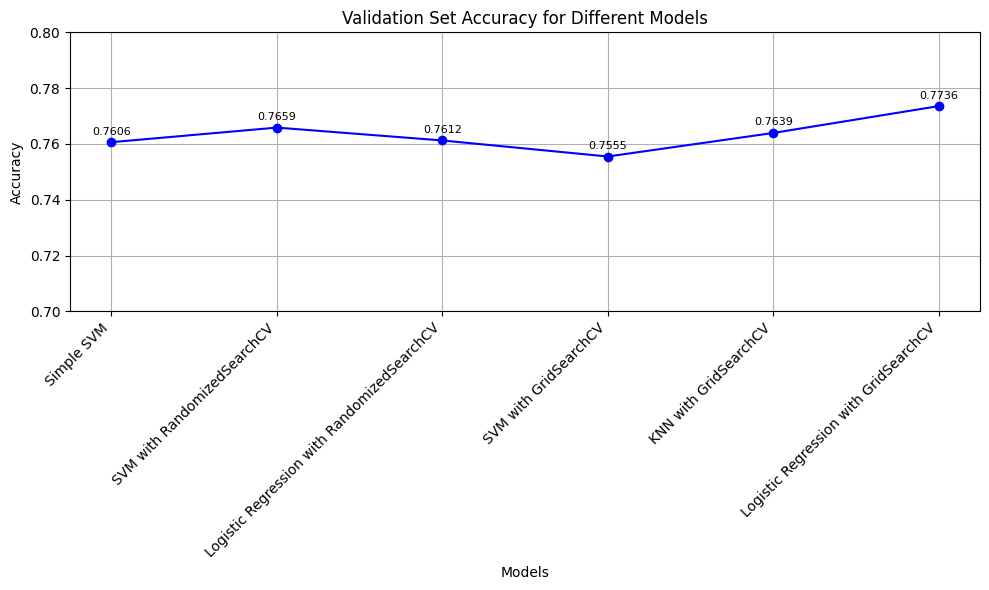

In [99]:
import matplotlib.pyplot as plt

# List of models
models = ['Simple SVM', 'SVM with RandomizedSearchCV', 'Logistic Regression with RandomizedSearchCV',
          'SVM with GridSearchCV', 'KNN with GridSearchCV', 'Logistic Regression with GridSearchCV']

# Corresponding validation set accuracies
accuracies = [0.7606304985337243, 0.7658599327329478, 0.7612499327323510, 0.7554985337243402, 0.7639349670578042, 0.773560972165662]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Validation Set Accuracy for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.8)  # Set y-axis range for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the accuracy values on the data points
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f'{acc:.4f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.grid(True)
plt.show()
